Import needed libraries:

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import unicodedata
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud
import time

In [2]:
import warnings
warnings.filterwarnings('ignore')

Load datasets:

In [3]:
data = pd.read_csv("C:\\Users\\user\\Downloads\\3rd Year 1st Sem Files\\AMAT 191\\cyberbullying_tweets.csv", encoding='latin-1')

Plot distribution of classes found in the dataset:

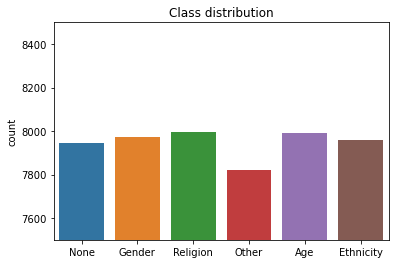

In [4]:
g = sns.countplot(x='cyberbullying_type', data=data)
g.set_title("Class distribution")
g.set_xticklabels(['None','Gender','Religion', 'Other', 'Age', 'Ethnicity'])
g.set_ylim(7500, 8500)
plt.xlabel("");

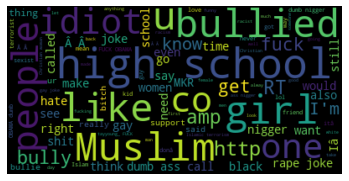

In [5]:
text = " ".join(tweet_text for tweet_text in data.tweet_text)

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="black", stopwords=stopwords.words("english")).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show();

The tweets from the dataset contain words commonly used in a language but are not useful for natural language processing tasks such as text classification, or simply put **stopwords**. Utilize NLTK module to exclude the stopwords to isolate focus of model to frequent patterns of each class. Moreover, exclude mismatched character encodings and other non-words.

In [6]:
stop_words = set(stopwords.words("english"))

Create New Column in dataset for the edited version.

In [7]:
tokenizer = RegexpTokenizer(r'\w+')

# Clean Whole dataset
data['text_clean'] = data['tweet_text'].apply(lambda x: unicodedata.normalize("NFKD", x))
data['text_clean'] = data['text_clean'].apply(lambda x: ' '.join([word for word in tokenizer.tokenize(x) if word not in (stop_words) and word not in {"http", "https", "MKR", "RT", "amp",}]))

In [8]:
# Join all the cleaned texts in the dataset
all_text = " ".join(data['text_clean'])

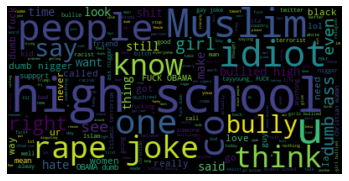

In [9]:
# Create a wordcloud object for the whole dataset
# Examine the frequent words in the the entire set and for each class
wordcloud = WordCloud().generate(all_text)

# Plot the wordcloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

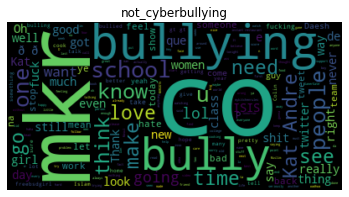

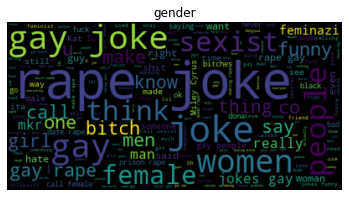

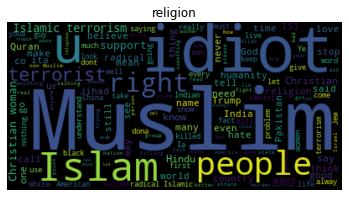

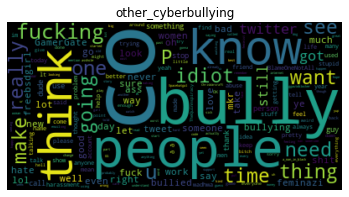

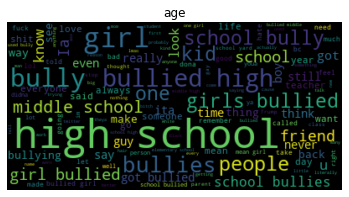

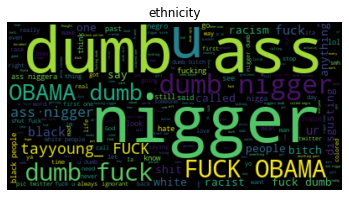

In [10]:
def create_wordcloud(class_name):
    # Get the rows of the dataframe that belong to the specific class
    class_data = data[data['cyberbullying_type'] == class_name]
    # Join all the cleaned texts of the specific class
    all_text = " ".join(class_data['text_clean'])
    # Create a wordcloud object
    wordcloud = WordCloud().generate(all_text)
    # Plot the wordcloud
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(class_name)
    plt.show()

# Create a wordcloud for each class
for class_name in data['cyberbullying_type'].unique():
    create_wordcloud(class_name)

Randomly Split data into training and test sets using the train_test_split function from the sklearn.model_selection module, with 80% of the data used for training phase, and remaining 20% for testing phase.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(data['text_clean'], data['cyberbullying_type'], test_size=0.2, random_state=42)

Convert the text data into numerical features, i.e. transform the occurences and frequencies in the dataset's vocabulary using the TfidfVectorizer class from the scikit-learn library

In [13]:
vectorizer = TfidfVectorizer(preprocessor = lambda x: x.lower())
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

For comparison, train the data using the commonly used model used by other proponents on the dataset, Naive Bayes:

In [29]:
# Train with Naive Bayes Model
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Make predictions on the test set 
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model 
acc = accuracy_score(y_test, y_pred)
print("Accuracy of the model trained with Naive Bayes: ", acc)

Accuracy of the model trained with Naive Bayes:  0.7512317853024426


**Training with SVC**:

Train data with Linear kernel:

In [23]:
start = time.time()

# Train the SVM model with linear kernel
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

# Make predictions on the test set 
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model 
acc1 = accuracy_score(y_test, y_pred)  

end = time.time()
print("Training time of Linear Kernel:", end - start)

Training time of Linear Kernel: 142.22387146949768


Train data with Polynomial kernel:

In [24]:
start = time.time()

# Train the SVM model with Polynomial kernel
clf = SVC(kernel='poly', degree=3)
clf.fit(X_train, y_train)

# Make predictions on the test set 
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model 
acc2 = accuracy_score(y_test, y_pred)

end = time.time()
print("Training time of Polynomial Kernel:", end - start) 

Training time of Polynomial Kernel: 1200.9664998054504


Train with RBF kernel:

In [26]:
start = time.time()

# Train the SVM model with RBF kernel
clf = SVC(kernel='rbf')
clf.fit(X_train, y_train)

# Make predictions on the test set 
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model 
acc3 = accuracy_score(y_test, y_pred)

end = time.time()
print("Training time of Polynomial Kernel:", end - start)    

Training time of Polynomial Kernel: 390.70674180984497


Train with sigmoid kernel:

In [33]:
start = time.time()

# Train the SVM model with sigmoid kernel
clf = SVC(kernel='sigmoid')
clf.fit(X_train, y_train)

# Make predictions on the test set 
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model 
acc4 = accuracy_score(y_test, y_pred)

end = time.time()
print("Training time of Polynomial Kernel:", end - start) 

Training time of Polynomial Kernel: 111.92662191390991


In [32]:
print("Accuracy of the model trained with Naive Bayes: ", acc)
print("Accuracy of Linear Kernel: ", acc1)   
print("Accuracy of Polynomial Kernel: ", acc2)   
print("Accuracy of RBF Kernel: ", acc3)   
print("Accuracy of Sigmoid Kernel: ", acc4)   

Accuracy of the model trained with Naive Bayes:  0.7512317853024426
Accuracy of Linear Kernel:  0.8342593563266589
Accuracy of Polynomial Kernel:  0.7234510955026733
Accuracy of RBF Kernel:  0.8218890869063843
Accuracy of Sigmoid Kernel:  0.8396058287032183


From the results above, we see that using a sigmoid kernel provides the highest accuracy among the others with a result of 0.8396

Classification report of the SVC Model with Sigmoid Kernel:

In [34]:
print(classification_report(y_test, y_pred))

                     precision    recall  f1-score   support

                age       0.95      0.98      0.96      1603
          ethnicity       0.98      0.98      0.98      1603
             gender       0.91      0.84      0.88      1531
  not_cyberbullying       0.63      0.55      0.59      1624
other_cyberbullying       0.63      0.73      0.68      1612
           religion       0.95      0.95      0.95      1566

           accuracy                           0.84      9539
          macro avg       0.84      0.84      0.84      9539
       weighted avg       0.84      0.84      0.84      9539



Visualize results with confusion matrix:

In [35]:
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1575,    0,    5,   12,   11,    0],
       [   4, 1572,    2,    8,   15,    2],
       [   5,   12, 1293,  123,   93,    5],
       [  57,   13,   50,  899,  545,   60],
       [  20,   12,   69,  324, 1176,   11],
       [   3,    3,    3,   50,   13, 1494]], dtype=int64)

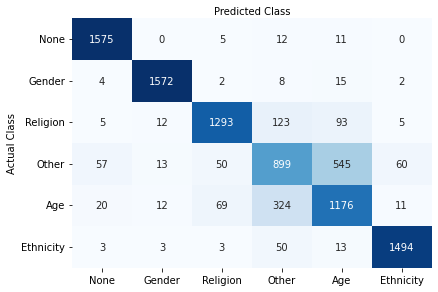

In [36]:
class_names = ['None','Gender','Religion', 'Other', 'Age', 'Ethnicity']
fig,ax = plt.subplots()


sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues", fmt="d", cbar=False, xticklabels=class_names, yticklabels=class_names)
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class');